In [110]:
using Plots
import SimulatedAnnealing

In [114]:
s = SimulatedAnnealing.State(1000, 1)

SimulatedAnnealing.State(1000, 1)

In [117]:
params = SimulatedAnnealing.Parameters(
    5000,
    5,
    100,
    1e-6
)

SimulatedAnnealing.Parameters(5000, 5, 100.0, 1.0e-6)

In [118]:
result = SimulatedAnnealing.optimize(s, params)

| ---------- | ----------- | ---------- |
|       step | temperature |     energy |
| ---------- | ----------- | ---------- |
|          1 |         100 |  995349.11 |
|       1001 |           3 |  361200.47 |
|       2001 |           0 |   34653.66 |
|       3001 |           0 |      -0.25 |
|       4001 |           0 |      -0.25 |
|       5000 |           0 |      -0.25 |
| ---------- | ----------- | ---------- |


SimulatedAnnealing.State(2.5006505411874995, 1)

In [119]:
result

SimulatedAnnealing.State(2.5006505411874995, 1)

In [120]:
SimulatedAnnealing.energy(result)

-0.24999957679616447

In [47]:
temp_func = SimulatedAnnealing.cooling_schedule(params)

(::SimulatedAnnealing.var"#temperature#1"{SimulatedAnnealing.Parameters}) (generic function with 1 method)

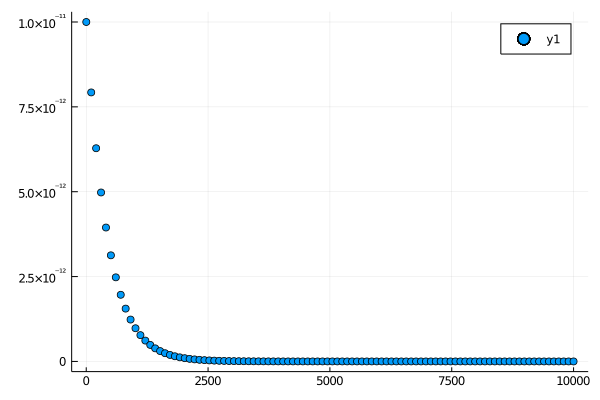

In [44]:
x = range(1, 10_000, length=100)
y = map(temp_func, x)
scatter(x, y)

In [61]:
Int(floor(10000 / 24))

416

In [11]:
for i in 1:10
    println(i)
end

1
2
3
4
5
6
7
8
9
10


In [233]:
f(x) = x^2 + 100sin(x)

f (generic function with 1 method)

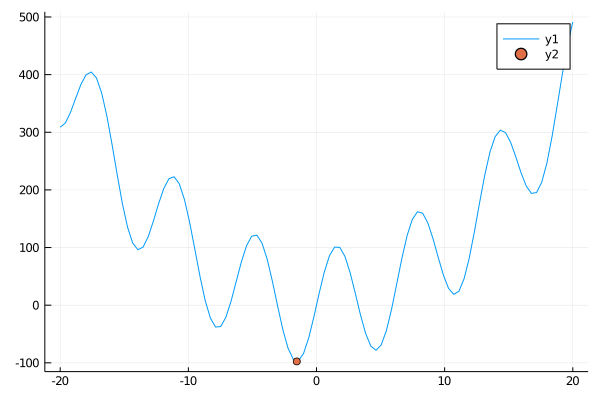

In [235]:
x = range(-20, 20, length=100)
y = f.(x)
plot(x, y)
scatter!([-1.54], [-97.581])